# コンバージョンの有無について広告戦略を立てるために顧客の分析を行う
データの形状の確認

In [35]:
import pandas as pd
df=pd.read_csv("sample_custmer.csv",encoding="shift-jis")
df

,ID,CV,AGE,SEX,AD
0,10,yes,38,Male,Mail
1,11,yes,30,Male,Mail
2,12,yes,25,Male,Mail
3,13,yes,38,Male,Mail
4,14,yes,41,Male,Mail
5,15,yes,26,Male,Listing
6,16,yes,26,Male,Listing
7,17,yes,26,Male,Listing
8,18,no,30,Female,Mail
9,19,no,21,Female,Mail


性別と広告がカテゴリであるため数量化する

In [36]:
dum=pd.get_dummies(df,columns=["SEX","AD"])
dum

,ID,CV,AGE,SEX_Female,SEX_Male,AD_DSP,AD_Listing,AD_Mail
0,10,yes,38,0,1,0,0,1
1,11,yes,30,0,1,0,0,1
2,12,yes,25,0,1,0,0,1
3,13,yes,38,0,1,0,0,1
4,14,yes,41,0,1,0,0,1
5,15,yes,26,0,1,0,1,0
6,16,yes,26,0,1,0,1,0
7,17,yes,26,0,1,0,1,0
8,18,no,30,1,0,0,0,1
9,19,no,21,1,0,0,0,1


コーディングで使う説明変数の項目名の抽出

In [38]:
dum.columns

Index(['ID', 'CV', 'AGE', 'SEX_Female', 'SEX_Male', 'AD_DSP', 'AD_Listing',
       'AD_Mail'],
      dtype='object')

目的変数「CV」の中身を確認

In [39]:
y_name='CV'
y=dum[y_name].values
x_table=dum.drop([y_name,'ID'],axis=1)
name=x_table.columns
x=x_table.values
print(y)

['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no'
 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes']


目的変数が数値化されたことを確認

In [40]:
class_name=["no","yes"]
y2=[]
for i in range(len(y)):
    if y[i]=='yes':
        y2.append(1)
    else:
        y2.append(0)
print(y2)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


決定木関係のライブラリのインポート

In [41]:
from sklearn.tree import DecisionTreeClassifier as DTC
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

決定木モデルの宣言

In [42]:
model=DTC()

学習させモデルを作成し分類過程の画像を作成する

In [43]:
import numpy as np
imp=[]
for i in range(10):
    model.fit(x,y2)
    imp.append(model.feature_importances_)
    dotdata=export_graphviz(model,filled=True,rounded=True,class_names=class_name,feature_names=name,out_file=None)
    graph=graph_from_dot_data(dotdata)
    graph.write_png("tree"+str(i)+".png")
    

各項目の重要度を算出

In [44]:
imp=np.array(imp).T
outimp=[]
for i in range(len(imp)):
    outimp.append(sum(imp[i])/len(imp[i]))
out=[]
out.append(name)
out.append(outimp)
out=np.array(out).T
dfo=pd.DataFrame(out)
dfo.columns=["項目","重要度"]
dfo

,項目,重要度
0,AGE,0.523773
1,SEX_Female,0.148205
2,SEX_Male,0.222308
3,AD_DSP,0.06
4,AD_Listing,0.01
5,AD_Mail,0.0357143


各項目の数値的条件の算出を行う

SVMのマージンの適性値を算出する

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
x2=preprocessing.minmax_scale(x)
score="f1"
tuned_parameters = [{'C': [0.1 ,1, 10, 100, 1000]},{'kernel':['linear']}]
SVM=GridSearchCV(SVC(),tuned_parameters,cv=10,scoring='%s_weighted' % score)
SVM.fit(x2,y2)
SVM.best_params_

C:\Users\decar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\decar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\decar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\decar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\decar\Anaconda3\l

{'C': 10}

マージンの数値(C)を10にする

In [46]:
model2=SVC(kernel='linear',C=10)

SVMに学習させる

In [48]:
model2.fit(x2,y2)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SVMの各項目別の数値の確認

In [49]:
model2.coef_

array([[ 6.32064276e-07, -1.00000005e+00,  1.00000005e+00,
         1.33306966e+00, -6.66822504e-01, -6.66247160e-01]])

各項目の数値を可視化

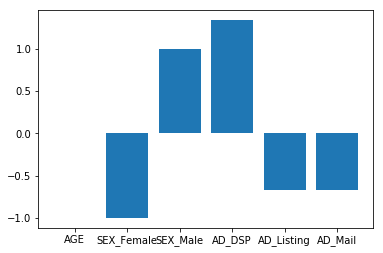

In [50]:
import matplotlib.pyplot as plt
import numpy as np
k=np.arange(0,len(name),1)
plt.bar(k,model2.coef_[0],tick_label=name)
plt.show()

年齢が重要度に対して勾配が小さいためボックスプロットで分布を可視化

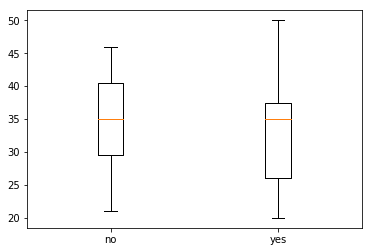

In [51]:
yes=[]
no=[]
for i in range(len(y2)):
    if y2[i]==1:
        yes.append(x[i][0])
    else:
        no.append(x[i][0])
plt.boxplot((no,yes),labels=class_name)
plt.show()

決定木のモデルから広告が男女によって差異があるため条件付き確率を算出する

女性に焦点を当てる

In [52]:
df_f=df.query("SEX == 'Female'")
df_f

,ID,CV,AGE,SEX,AD
8,18,no,30,Female,Mail
9,19,no,21,Female,Mail
10,20,no,31,Female,Mail
11,21,no,40,Female,Mail
12,22,no,44,Female,Mail
17,27,no,41,Female,Mail
18,28,yes,50,Female,Mail
19,29,no,46,Female,Mail
20,30,no,35,Female,Mail
21,31,no,34,Female,Mail


各広告別に条件付き確率を算出する

In [53]:
df_f_M=df_f.query("AD == 'Mail'")
df_f_L=df_f.query("AD == 'Listing'")
df_f_D=df_f.query("AD == 'DSP'")
print("p(yes|Female and Mail)="+str(len(df_f_M.query("CV=='yes'").values)/len(df_f_M.values)))
print("p(yes|Female and Listing)="+str(len(df_f_L.query("CV=='yes'").values)/len(df_f_L.values)))
print("p(yes|Female and DSP)="+str(len(df_f_D.query("CV=='yes'").values)/len(df_f_D.values)))

p(yes|Female and Mail)=0.18181818181818182
p(yes|Female and Listing)=0.4
p(yes|Female and DSP)=0.75


男性に焦点を当てる

In [54]:
df_m=df.query("SEX == 'Male'")
df_m

,ID,CV,AGE,SEX,AD
0,10,yes,38,Male,Mail
1,11,yes,30,Male,Mail
2,12,yes,25,Male,Mail
3,13,yes,38,Male,Mail
4,14,yes,41,Male,Mail
5,15,yes,26,Male,Listing
6,16,yes,26,Male,Listing
7,17,yes,26,Male,Listing
13,23,yes,33,Male,Listing
14,24,yes,29,Male,Listing


ほぼ「yes」しかないため男性という条件だけで条件付確率を算出する

In [55]:
print("p(yes|Male)="+str(len(df_m.query("CV == 'yes'").values)/len(df_m.values)))

p(yes|Male)=0.9615384615384616


# 分析結果の解釈
まず、重要度に着目すると平均的に「AGE(年齢)」の比率が非常に高い。次いで「SEX(性別)」の要素が入り、最も重要度が低かったのが「AD(広告)」であったことが分かる。しかし、数値的条件を確認すると重要度に対して年齢の数値の絶対値が低いが、数値の分布を確認するとカテゴリごとの数値に大きな違いが見られないため年齢で分けられるが、条件が複雑であることが分かる。次に、作成した分類過程に着目すると広告の手段がメールだと最終的にコンバージョンされにくい傾向にあることが分かる。一方でDSPはコンバージョンされやすい傾向にあることが分かる。また、基本的に広告の傾向が出やすいのは分類過程に着目すると女性であることが分かり、男性の場合は年齢的な要因でコンバージョンの有無が変わることが分かる。ここで性別ごとに条件付確率を分析すると男性の時だと広告の種類を問わず96%(p(yes│Male))がコンバージョンしているため男性に対しては広告の種類そのものを気にする必要性が小さいが、女性の場合はメールを用いると82%(p(no│(Female∩Mail) ))でリスティングでは60%(p(no|Female∩Listing))がコンバージョンしない。一方でDSPでは75%( p(yes|Female∩DSP))がコンバージョンしている。

# 分析結果から戦略を考える
コンバージョンすることを目的とした広告戦略を行う場合にはメールを用いるよりもDSPや場合によってリスティングを用いた方が良いことが分かる。また、閲覧者の性別で考えると男性の場合は広告の内容問わずコンバージョンするが女性の場合は若年層でDSPが最も費用対効果を期待できると考えられる。